In [79]:
# import dependencies
#%matplotlib inline
#import pandas as pd
#import numpy as np
#import nltk
#from nltk.corpus import stopwords
#import gensim
from gensim.models import LdaModel
from gensim import models, corpora, similarities
#import re
#from nltk.stem.porter import PorterStemmer
#import time
#from nltk import FreqDist
from scipy.stats import entropy
#import matplotlib.pyplot as plt
#import seaborn as sns
#sns.set_style("darkgrid")
#from nltk.stem import WordNetLemmatizer

In [1]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\Cohort 2 DSFTML\Anaconda3\lib\site-packages\gensim\utils.py:1209: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [34]:
from nltk.stem import WordNetLemmatizer
import time
from nltk import FreqDist

In [27]:
#nltk.download('wordnet')

In [ ]:
#nlp = spacy.load('{name}')

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

### import our data

In [3]:
path = '12092018_dataframe_with_Abstract_Benjamin.csv'
df = pd.read_csv(path)

In [4]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.drop('Unnamed: 0.1', axis=1, inplace=True)

In [5]:
df.dropna(subset=['abstract'], inplace=True)
df.dropna(subset=['54'], inplace=True)
df.head()

,Patent Type,51,11,11A,13,25,21,22,86,86A,87,30,62,54,73N,73C,71N,71C,72,74N,74C,wo_numbers1,abstract
1,Type1,A01N,1245584,EP3232777 A,A,En,18104999.3,18.04.2018,18.12.2015 PCT/EP2015/080688,PCT/EP2015/080688,23.06.2016 WO2016/097390,19.12.2014 EP 14382548,NaN,PRESERVATION AND TRANSPORT OF AN EX VIVO BIOLO...,NaN,NaN,Institut d'Investigacions Biomèdiques August P...,BARCELONA SPAIN,"PERALTA, Carmen",China Patent Agent (H.K.) Ltd.,Wanchai HONG KONG,WO2016097390,The present invention relates to a device for ...
2,Type1,A23B2018,1245585,CN107404887 A,A,Ja,18105388.9,25.04.2018,18.03.2016 PCT/JP2016/058840,PCT/JP2016/058840,06.10.2016 WO2016/158527,30.03.2015 JP 2015-070361,NaN,INSTANT PROCESSED MEAT PRODUCT AND METHOD FOR ...,NaN,NaN,"SANYO FOODS CO., LTD.",TOKYO JAPAN,"NAGAYAMA, YOSHIAKI ONOZAWA, TORU",CLT Patent & Trademark (H.K.) Ltd.,Wanchai HONG KONG,WO2016158527,Provided at low cost are: an instant processed...
3,Type1,A23C,1245586,EP3240429 A,A,En,18105103.3,19.04.2018,30.12.2015 PCT/US2015/068050,PCT/US2015/068050,07.07.2016 WO2016/109659,"30.12.2014 US 62/098,151",NaN,METHODS OF PREVENTING AND TREATING BRONCHOPULM...,NaN,NaN,"PROLACTA BIOSCIENCE, INC.",CA UNITED STATESUNITED STATE...,Martin LEE Scott ELSTER Joseph...,SANYOU INTERNATIONAL INTELLECTUAL PROPERTY AGE...,WANCHAI HONG KONG,WO2016109659,The disclosure features a human milk cream com...
4,Type1,A23LA61KA61P,1245588*,CN107427058 A,A,Ja,18104907.4,16.04.2018,29.01.2016 PCT/JP2016/052638,PCT/JP2016/052638,04.08.2016 WO2016/121923,29.01.2015 JP 2015-016093,NaN,MUSCLE SYNTHESIS PROMOTER,NaN,NaN,"MEIJI CO., LTD.",TOKYO JAPAN,NAKAYAMA Kyosuke KANDA Atsushi ...,Zhongzi IP,Wanchai Hong Kong,WO2016121923,The present invention pertains to a muscle syn...
5,Type1,A24BA24F,1245589*,EP3297460 A,A,En,18105071.1,19.04.2018,19.05.2016 PCT/EP2016/061313,PCT/EP2016/061313,24.11.2016 WO2016/184977,20.05.2015 GB 201508671,NaN,AEROSOL GENERATING MATERIAL AND DEVICES INCLUD...,NaN,NaN,BRITISH AMERICAN TOBACCO (INVESTMENTS) LIMITED,LONDON WCR LA UNITED KINGDOM,"AOUN, Walid Abi ALLBUTT, Bryan ...",China Patent Agent (H.K.) Ltd.,Wanchai HONG KONG,WO2016184977,There is provided a solid aerosol generating m...


In [6]:
len(df)

52150

In [10]:
df['abstract'].isnull().sum()

0

In [11]:
df['54'].isnull().sum()

0

In [8]:
data = df['abstract'].tolist()
data[0]

'The present invention relates to a device for transport and preservation of an ex vivo biological sample and corresponding method. The device (1) comprises a chamber (2) for containing the biological sample (100), delimitated by walls (4) made of a thermal insulating material. The device, furthermore, incorporates cooling means (6) that keep the temperature inside the chamber (2) below the temperature outside the device (1). Finally, an ultrasound system suitable for generating and applying ultrasound on the biological sample (100) is provided. The invention also proposes a method for transport and preservation which combines applying cooling and ultrasound to reduce cell damage in the biological sample.'

#### Prepare Stopwords

In [15]:
import nltk
from nltk.corpus import stopwords

In [16]:
# load nltk's English stopwords as variable called 'stopwords'
my_stopwords = nltk.corpus.stopwords.words('english')
stopwords2 = ['method','invention','using','provided','includes','comprises','relates','solution','containing','processed','producing','formed','section','present','formed','main','system','control','said','wherein','mean','work','lead','toy','thereof','prepar','first','second','third','may','modif','develop','set','number','invent','include','connect','method','also','one','least','compris','provide','process','include','apparatus','end','disclose','contain','plural','within','two','reduce','improve','extend','use','form','andor','select']
my_stopwords.extend(stopwords2)

#### Tokenize and clean Text

In [31]:
def initial_clean(text):
    """
    Function to clean text and any punctuation
    We also lower case the text
    """
    text = re.sub("[^a-zA-Z ]", "", text)
    text = text.lower() # lower case the text
    text = nltk.word_tokenize(text)
    return text

my_stopwords = stopwords.words('english')
stopwords2 = ['method','invention','using','provided','includes','comprises','relates','solution','containing','processed','producing','formed','section','present','formed','main','system','control','said','wherein','mean','work','lead','toy','thereof','prepar','first','second','third','may','modif','develop','set','number','invent','include','connect','method','also','one','least','compris','provide','process','include','apparatus','end','disclose','contain','plural','within','two','reduce','improve','extend','use','form','andor','select']
my_stopwords.extend(stopwords2)
stop_words = my_stopwords
def remove_stop_words(text):
    """
    Function that removes all stopwords from text
    """
    return [word for word in text if word not in stop_words]


lmtzr = WordNetLemmatizer()
def lemmatize(text):
    """
    Function to stem words, so plural and singular are treated the same
    """
    try:
        text = [lmtzr.lemmatize(word) for word in text]
        text = [word for word in text if len(word) > 1] # make sure we have no 1 letter words
        text = [word for word in text if word not in stop_words]
    except IndexError: # the word "oed" broke this, so needed try except
        pass
    return text

def apply_all(text):
    """
    This function applies all the functions above into one
    """
    return lemmatize(remove_stop_words(initial_clean(text)))

In [32]:
# clean text and title and create new column "tokenized"
t1 = time.time()
df['tokenized'] = df['abstract'].apply(apply_all) + df['54'].apply(apply_all)
t2 = time.time()
print("Time to clean and tokenize", len(df), "abstracts:", (t2-t1)/60, "min")


Time to clean and tokenize 52150 abstracts: 0.7312554995218913 min


#### Save the Tokenized Dataframe

In [11]:
#path = '18092018_dataframe_with_tokenized_Abstract_Benjamin.csv'
#df.to_csv(path)

In [ ]:
#df = pd.read_csv(path)

### Get Words frequency

In [35]:
# first get a list of all words
all_words = [word for item in list(df['tokenized']) for word in item]
# use nltk fdist to get a frequency distribution of all words
fdist = FreqDist(all_words)
len(fdist) # number of unique words

92707

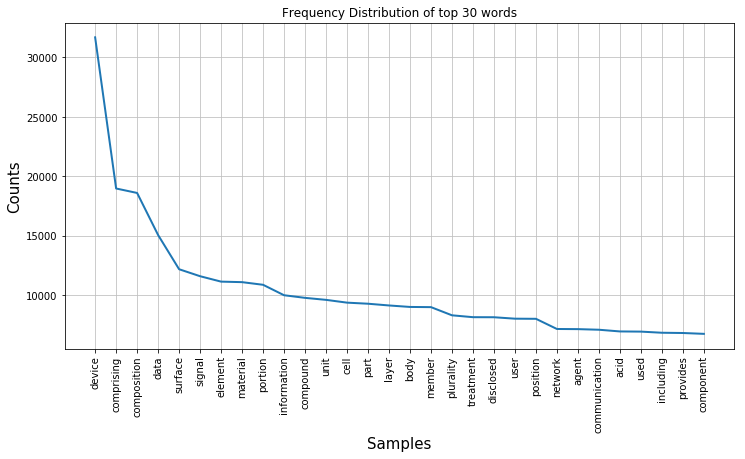

In [36]:
fig, ax = plt.subplots(figsize=(12,6));
ax.set_xlabel('Top 30 words', fontsize=15)
ax.set_ylabel('Frequency', fontsize=15)
ax.grid()
fdist.plot(30,cumulative=False, title='Frequency Distribution of top 30 words')

In [37]:
# choose k and visually inspect the bottom 10 words of the top k
k = 80000
top_k_words = fdist.most_common(k)
top_k_words[-10:]

[('thiophenepyrimidinones', 1),
 ('cassettetransportersatp', 1),
 ('interferoninducing', 1),
 ('igif', 1),
 ('flowconnected', 1),
 ('electromagneticultrasonic', 1),
 ('rollcallinganswering', 1),
 ('eurasystem', 1),
 ('positioningeura', 1),
 ('armino', 1)]

In [38]:
top_k_words[:10]

[('device', 31689),
 ('comprising', 18974),
 ('composition', 18599),
 ('data', 15059),
 ('surface', 12183),
 ('signal', 11595),
 ('element', 11140),
 ('material', 11096),
 ('portion', 10874),
 ('information', 9995)]

In [39]:
top_k_words[15000]

('selfligating', 9)

k = 70,000 is too high, as the bottom words aren't even real words and are very rarely used (once in entire corpus)

k = 15,000 is much more reasonable as these have been used at least 11 times in the corpus

In [40]:
# define a function only to keep words in the top k words
k1 = 15000
top_k_words,_ = zip(*fdist.most_common(k1))
top_k_words = set(top_k_words)
def keep_top_k_words(text):
    return [word for word in text if word in top_k_words]

In [41]:
df['tokenized'] = df['tokenized'].apply(keep_top_k_words)

In [42]:
# document length
df['doc_len'] = df['tokenized'].apply(lambda x: len(x))
doc_lengths = list(df['doc_len'])
df.drop(labels='doc_len', axis=1, inplace=True)

print("length of list:",len(doc_lengths),
      "\naverage document length", np.average(doc_lengths),
      "\nminimum document length", min(doc_lengths),
      "\nmaximum document length", max(doc_lengths))

length of list: 52150 
average document length 52.45357622243528 
minimum document length 2 
maximum document length 666


# Plot a Histogram of Document Lenght

C:\Users\Cohort 2 DSFTML\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


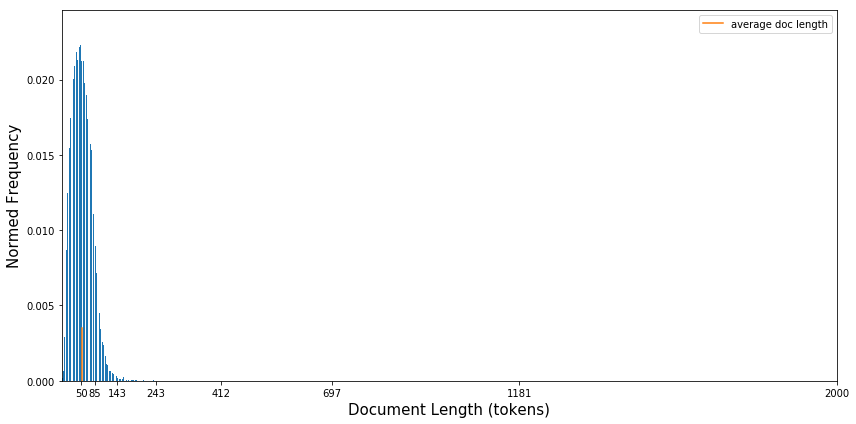

In [43]:
# plot a histogram of document length
num_bins = 1000
fig, ax = plt.subplots(figsize=(12,6));
# the histogram of the data
n, bins, patches = ax.hist(doc_lengths, num_bins, normed=1)
ax.set_xlabel('Document Length (tokens)', fontsize=15)
ax.set_ylabel('Normed Frequency', fontsize=15)
ax.grid()
ax.set_xticks(np.logspace(start=np.log10(50),stop=np.log10(2000),num=8, base=10.0))
plt.xlim(0,2000)
ax.plot([np.average(doc_lengths) for i in np.linspace(0.0,0.0035,100)], np.linspace(0.0,0.0035,100), '-',
        label='average doc length')
ax.legend()
ax.grid()
fig.tight_layout()
plt.show()

### Drop short articles
LDA does not work very well on short documents, which we will explain later, so we will drop some of the shorter articles here before training the model.

From the histogram above, droping all articles less than 40 tokens seems appropriate.

In [44]:
# only keep articles with more than 30 tokens, otherwise too short
df = df[df['tokenized'].map(len) >= 30]
# make sure all tokenized items are lists
df = df[df['tokenized'].map(type) == list]
df.reset_index(drop=True,inplace=True)
print("After cleaning and excluding short aticles, the dataframe now has:", len(df), "articles")

After cleaning and excluding short aticles, the dataframe now has: 41486 articles


In [45]:
df.head()

,Patent Type,51,11,11A,13,25,21,22,86,86A,87,30,62,54,73N,73C,71N,71C,72,74N,74C,wo_numbers1,abstract,tokenized
0,Type1,A01N,1245584,EP3232777 A,A,En,18104999.3,18.04.2018,18.12.2015 PCT/EP2015/080688,PCT/EP2015/080688,23.06.2016 WO2016/097390,19.12.2014 EP 14382548,NaN,PRESERVATION AND TRANSPORT OF AN EX VIVO BIOLO...,NaN,NaN,Institut d'Investigacions Biomèdiques August P...,BARCELONA SPAIN,"PERALTA, Carmen",China Patent Agent (H.K.) Ltd.,Wanchai HONG KONG,WO2016097390,The present invention relates to a device for ...,"[device, transport, preservation, ex, vivo, bi..."
1,Type1,A23B2018,1245585,CN107404887 A,A,Ja,18105388.9,25.04.2018,18.03.2016 PCT/JP2016/058840,PCT/JP2016/058840,06.10.2016 WO2016/158527,30.03.2015 JP 2015-070361,NaN,INSTANT PROCESSED MEAT PRODUCT AND METHOD FOR ...,NaN,NaN,"SANYO FOODS CO., LTD.",TOKYO JAPAN,"NAGAYAMA, YOSHIAKI ONOZAWA, TORU",CLT Patent & Trademark (H.K.) Ltd.,Wanchai HONG KONG,WO2016158527,Provided at low cost are: an instant processed...,"[low, cost, instant, meat, product, extremely,..."
2,Type1,A23C,1245586,EP3240429 A,A,En,18105103.3,19.04.2018,30.12.2015 PCT/US2015/068050,PCT/US2015/068050,07.07.2016 WO2016/109659,"30.12.2014 US 62/098,151",NaN,METHODS OF PREVENTING AND TREATING BRONCHOPULM...,NaN,NaN,"PROLACTA BIOSCIENCE, INC.",CA UNITED STATESUNITED STATE...,Martin LEE Scott ELSTER Joseph...,SANYOU INTERNATIONAL INTELLECTUAL PROPERTY AGE...,WANCHAI HONG KONG,WO2016109659,The disclosure features a human milk cream com...,"[disclosure, feature, human, milk, cream, comp..."
3,Type1,A23LA61KA61P,1245588*,CN107427058 A,A,Ja,18104907.4,16.04.2018,29.01.2016 PCT/JP2016/052638,PCT/JP2016/052638,04.08.2016 WO2016/121923,29.01.2015 JP 2015-016093,NaN,MUSCLE SYNTHESIS PROMOTER,NaN,NaN,"MEIJI CO., LTD.",TOKYO JAPAN,NAKAYAMA Kyosuke KANDA Atsushi ...,Zhongzi IP,Wanchai Hong Kong,WO2016121923,The present invention pertains to a muscle syn...,"[pertains, muscle, synthesis, promoter, exhibi..."
4,Type1,A24F,1245591,EP3229623 A,A,En,18104839.7,13.04.2018,04.12.2015 PCT/US2015/063929,PCT/US2015/063929,16.06.2016 WO2016/094225,"09.12.2014 US 14/565,137",NaN,GESTURE RECOGNITION USER INTERFACE FOR AN AERO...,NaN,NaN,"RAI Strategic Holdings, Inc.",WinstonSalem NC UNITED STATE...,"HENRY, Raymond C Jr LAMB, Wilson Chris...",CHLOE LEE & CO,Wanchai HONG KONG,WO2016094225,An aerosol delivery device is provided that in...,"[aerosol, delivery, device, housing, motion, s..."


### Create the Dictionary and Corpus needed for Topic Modeling

In [46]:
# Create Dictionary
dictionary = corpora.Dictionary(df['tokenized'])

# Create Corpus
texts = df['tokenized']

# Term Document Frequency
corpus = [dictionary.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 2), (2, 5), (3, 1), (4, 2), (5, 1), (6, 2), (7, 1), (8, 1), (9, 4), (10, 2), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 3), (22, 1), (23, 5), (24, 1), (25, 2), (26, 1), (27, 3), (28, 3), (29, 2), (30, 1)]]


### Split the corpus into training and testing
Here we will split the corpus into training and testing sets.

The training set will be used to train the LDA model on, while the testing set will be used to retrieve similar articles later in our recommendation algorithm.

The dataframe is already shuffled from the begining, so no need to do it again.

In [47]:
# create a mask of binary values
msk = np.random.rand(len(df)) < 0.999

In [48]:
train_df = df[msk]
train_df.reset_index(drop=True,inplace=True)

test_df = df[~msk]
test_df.reset_index(drop=True,inplace=True)

In [49]:
print(len(df),len(train_df),len(test_df))

41486 41440 46


### Applying LDA for Document similarity

LDA
Latent Dirichlet Allocation, is an unsupervised generative model that assigns topic distributions to documents.

At a high level, the model assumes that each document will contain several topics, so that there is topic overlap within a document. The words in each document contribute to these topics. The topics may not be known a priori, and needn't even be specified, but the number of topics must be specified a priori. Finally, there can be words overlap between topics, so several topics may share the same words.

The model generates to latent (hidden) variables 1) A distribution over topics for each document 2) A distribution over words for each topics

After training, each document will have a discrete distribution over all topics, and each topic will have a discrete distribution over all words.

It is best to demonstrate this with an example. Let's say a document about the presidential elections may have a high contribution from the topics "presidential elections", "america", "voting" but have very low contributions from topics "himalayan mountain range", "video games", "machine learning" (assuming the corpus is varied enough to contain such articles); the topics "presidential elections" may have top contributing words ["vote","election","people","usa","clinton","trump",...] whereas the top contributing words in the topic "himalayan mountain range" may be ["nepal","everest","china","altitude","river","snow",....]. This very rough example should give you an idea of what LDA aims to do.

An important point to note: although I have named some topics in the example above, the model itself does not actually do any "naming" or classifying of topics. But by visually inspecting the top contributing words of a topic i.e. the discrete distribution over words for a topic, one can name the topics if necessary after training. We will show this more later.

There a several ways to implement LDA, however I will speak about collapsed gibbs sampling as I usually find this to be the easiest way to understand it.

The model initialises by assigning every word in every document to a random topic. Then, we iterate through each word, unassign it's current topic, decrement the topic count corpus wide and reassign the word to a new topic based on the local probability of topic assignemnts to the current document, and the global (corpus wide) probability of the word assignments to the current topic. 

In [56]:
def train_lda(data):
    """
    This function trains the lda model
    """
    num_topics = 100
    dictionary = corpora.Dictionary(data['tokenized'])
    corpus = [dictionary.doc2bow(doc) for doc in data['tokenized']]
    t1 = time.time()
     # low alpha means each document is only represented by a small number of topics, and vice versa
    # low eta means each topic is only represented by a small number of words, and vice versa
    lda = models.LdaMulticore(corpus=corpus, num_topics=num_topics, id2word=dictionary,
                   alpha=1e-2, eta=0.5e-2, minimum_probability=0.0, passes=50, workers=6)
    t2 = time.time()
    print("Time to train LDA model on ", len(df), "abstracts: ", (t2-t1)/60, "min")
    return dictionary,corpus,lda

In [57]:
dictionary,corpus,lda = train_lda(train_df)

C:\Users\Cohort 2 DSFTML\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:1023: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)


Time to train LDA model on  41486 abstracts:  5.452661828200022 min


### SAVE MODEL TO DISK

In [58]:
from gensim.test.utils import datapath

# Save model to disk.
# temp_file = datapath("/Users/GeYu/Desktop/FINAL_CAPSTONE/modelfinal50topics")
#optimal_model.save(temp_file)

# # Load a potentially pretrained model from disk.
# lda = LdaModel.load(temp_file)

In [59]:
lda.show_topic(topicid = 87, topn=20 )

[('mechanism', 0.17936458),
 ('phase', 0.12422619),
 ('lever', 0.029687077),
 ('mechanical', 0.021161895),
 ('trigger', 0.020652855),
 ('pressing', 0.019738873),
 ('stationary', 0.018158682),
 ('press', 0.017232643),
 ('displacement', 0.015509059),
 ('releasing', 0.014528193),
 ('chassis', 0.014456001),
 ('comprising', 0.011931559),
 ('timepiece', 0.011628858),
 ('release', 0.009709527),
 ('dough', 0.009471292),
 ('movement', 0.009449744),
 ('bias', 0.007608036),
 ('neutral', 0.00755032),
 ('oscillation', 0.0075160395),
 ('transition', 0.007425421)]

In [60]:
lda.print_topics(num_topics=100, num_words=10)

[(0,
  '0.192*"article" + 0.081*"rod" + 0.034*"smoking" + 0.033*"sector" + 0.029*"tobacco" + 0.027*"cigarette" + 0.022*"activated" + 0.020*"framework" + 0.020*"smoke" + 0.013*"lattice"'),
 (1,
  '0.046*"treatment" + 0.039*"disease" + 0.035*"composition" + 0.029*"compound" + 0.028*"treating" + 0.023*"disorder" + 0.016*"subject" + 0.016*"pharmaceutical" + 0.015*"comprising" + 0.015*"inhibitor"'),
 (2,
  '0.101*"panel" + 0.095*"multiple" + 0.056*"symbol" + 0.027*"pilot" + 0.023*"estimate" + 0.022*"channel" + 0.019*"metric" + 0.015*"division" + 0.015*"timing" + 0.014*"different"'),
 (3,
  '0.284*"contact" + 0.123*"lens" + 0.081*"radiation" + 0.077*"band" + 0.042*"eye" + 0.028*"electromagnetic" + 0.022*"ophthalmic" + 0.017*"intraocular" + 0.014*"flame" + 0.013*"hydrogel"'),
 (4,
  '0.140*"test" + 0.097*"strip" + 0.082*"board" + 0.049*"printed" + 0.044*"right" + 0.037*"testing" + 0.035*"left" + 0.023*"tile" + 0.019*"wiring" + 0.016*"guard"'),
 (5,
  '0.103*"embodiment" + 0.074*"parameter" + 

In [61]:
# select an abstract at random from df
random_abstract_index = np.random.randint(len(df))
bow = dictionary.doc2bow(df.iloc[random_abstract_index,23])
print(random_abstract_index)

26687


In [62]:
df.iloc[random_abstract_index,22]

'According to a first aspect the invention relates to the use of fumaric acid derivatives selected from the group consisting of dialkyl fumarates, monoalkyl hydrogen fumarates, fumaric acid monoalkyl ester salts, fumaric acid monoamides, monoamido fumaric acid salts, fumaric acid diamides, monoalkyl monoamido fumarates, carbocyclic and oxacarbocyclic oligomers of these compounds and mixtures thereof for preparing a drug for the treatment or prevention of cardiac insufficiency, in particular left ventricular insufficiency, myocardial infarction and angina pectoris. According to a second aspect the invention relates to the use of fumaric acid derivatives, selected from the group consisting of dialkyl fumarates, monoalkyl hydrogen fumarates, fumaric acid monoaklyl ester salts, fumaric acid monoamido fumaric acid salts, fumaric acid diamides, monoalkyl monoamido fumarates, carbocyclic and oxacarbocyclic oligomers of these compounds and mixtures thereof for preparing a drug for the treatmen

In [63]:
doc_distribution = np.array([tup[1] for tup in lda.get_document_topics(bow=bow)])

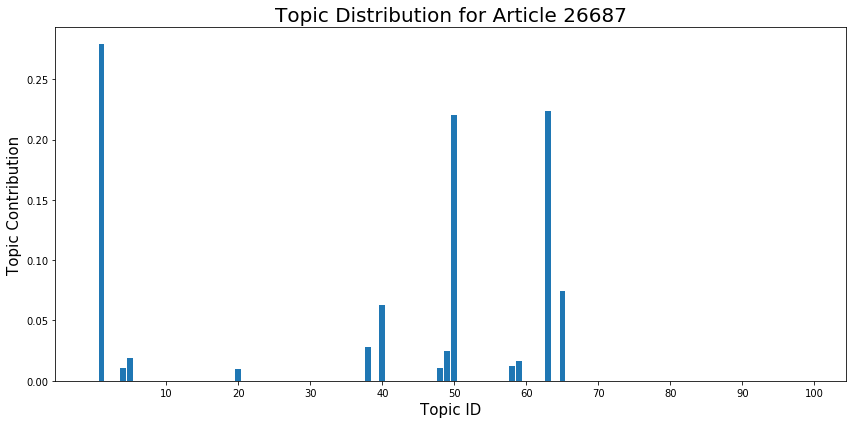

In [64]:
# bar plot of topic distribution for this document
fig, ax = plt.subplots(figsize=(12,6));
# the histogram of the data
patches = ax.bar(np.arange(len(doc_distribution)), doc_distribution)
ax.set_xlabel('Topic ID', fontsize=15)
ax.set_ylabel('Topic Contribution', fontsize=15)
ax.set_title("Topic Distribution for Article " + str(random_abstract_index), fontsize=20)
ax.set_xticks(np.linspace(10,100,10))
fig.tight_layout()
plt.show()

In [65]:
# print the top 5 contributing topics and their words
for i in doc_distribution.argsort()[-5:][::-1]:
    print(i, lda.show_topic(topicid=i, topn=10), "\n")

1 [('treatment', 0.045625545), ('disease', 0.039442115), ('composition', 0.03476682), ('compound', 0.028659126), ('treating', 0.028340157), ('disorder', 0.02278743), ('subject', 0.016203472), ('pharmaceutical', 0.015632704), ('comprising', 0.015368002), ('inhibitor', 0.015307363)] 

63 [('acid', 0.07015191), ('compound', 0.066490784), ('reaction', 0.04075235), ('salt', 0.028355248), ('catalyst', 0.024958147), ('ii', 0.021959748), ('preparation', 0.021434527), ('metal', 0.020607563), ('mixture', 0.019118425), ('iii', 0.013855408)] 

50 [('group', 0.16228189), ('formula', 0.054797504), ('selected', 0.03897014), ('alkyl', 0.037727904), ('compound', 0.034350272), ('substituted', 0.033786964), ('atom', 0.03155604), ('represents', 0.029607598), ('optionally', 0.024673149), ('hydrogen', 0.024035726)] 

65 [('unit', 0.48525807), ('storage', 0.13921686), ('bus', 0.030639326), ('candidate', 0.0243643), ('adjustment', 0.01842843), ('processing', 0.017201794), ('charging', 0.012023763), ('storing'

### Similarity Queries and Unseen Data
We will now turn our attention to the test set of data which the model has not yet seen. Although the articles in test_df have been unseen by the model, gensim has a way of infering their topic distributions given the trained model. Of course, the correct approach to yield accurate results would be to retrain the model with these new articles part of the corpus, but this can be timely and infeasable in a real case scenario where results are needed quickly.

First, lets show how we can infer document topics for a new unseen article.

In [66]:
# select and article at random from test_df
random_article_index = np.random.randint(len(test_df))
print(random_article_index)

3


Here's the important bit. In obtaining the BOW representation for this unseen article, gensim cleverly only considers words in the existing dictionary we used to train the model. So if there are new words in this article, they will not be considered when infering the topic distribution. This is good in that no errors arise for unseen words, but bad in that some words may be cut out, and therefore we could miss out on an accurate topic distribution for this article.

However, we mitigate this risk because the training set is very much representative of the entire corpus; 99.9% of the observations are in the training set, with only 0.01% of observations in the test set. So most, if not all, words from the test set should be in the training set's dictionary.

In [67]:
new_bow = dictionary.doc2bow(test_df.iloc[random_article_index,23])

In [68]:
print(test_df.iloc[random_article_index,22], '\n\n',test_df.iloc[random_article_index,13] )

This application provides a method of using aptamers to determine the presence of HCPs in a recombinant protein preparation, and provides methods of preparing a plurality of aptamers for use in the method of detecting a plurality of HCPs in a recombinant protein preparation. In accordance with the description, a method of determining the presence or absence of a plurality of HCPs in a recombinant protein preparation comprises: providing a recombinant protein preparation; providing a final pool of aptamers; combining the recombinant protein preparation with the final pool of aptamers; and determining the presence or absence of a plurality of HCPs. 

 DETECTING RESIDUAL HOST CELL PROTEINS IN RECOMBINANT PROTEIN
PREPARATIONS


In [69]:
new_doc_distribution = np.array([tup[1] for tup in lda.get_document_topics(bow=new_bow)])

Let's do the same visual analysis as before on this new unseen document

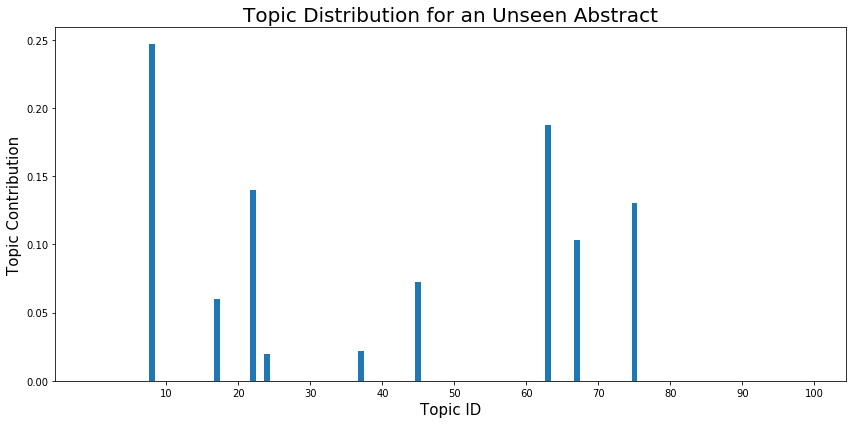

In [70]:
# bar plot of topic distribution for this document
fig, ax = plt.subplots(figsize=(12,6));
# the histogram of the data
patches = ax.bar(np.arange(len(new_doc_distribution)), new_doc_distribution)
ax.set_xlabel('Topic ID', fontsize=15)
ax.set_ylabel('Topic Contribution', fontsize=15)
ax.set_title("Topic Distribution for an Unseen Abstract", fontsize=20)
ax.set_xticks(np.linspace(10,100,10))
fig.tight_layout()
plt.show()

In [71]:
# print the top 8 contributing topics and their words
for i in new_doc_distribution.argsort()[-5:][::-1]:
    print(i, lda.show_topic(topicid=i, topn=10), "\n")

8 [('cell', 0.1615256), ('protein', 0.026121702), ('acid', 0.024854196), ('nucleic', 0.021997334), ('polypeptide', 0.020218924), ('gene', 0.01988662), ('expression', 0.017714838), ('virus', 0.01641511), ('comprising', 0.015949976), ('stem', 0.015507618)] 

63 [('acid', 0.07015191), ('compound', 0.066490784), ('reaction', 0.04075235), ('salt', 0.028355248), ('catalyst', 0.024958147), ('ii', 0.021959748), ('preparation', 0.021434527), ('metal', 0.020607563), ('mixture', 0.019118425), ('iii', 0.013855408)] 

22 [('sample', 0.090304844), ('antibody', 0.059176598), ('binding', 0.03409702), ('marker', 0.026094003), ('biological', 0.022221752), ('molecule', 0.019847777), ('fragment', 0.019284535), ('presence', 0.016924603), ('assay', 0.0154186), ('detecting', 0.015022483)] 

75 [('value', 0.11735116), ('rate', 0.030031366), ('bit', 0.022805585), ('based', 0.019836683), ('error', 0.017617945), ('encoding', 0.016969461), ('threshold', 0.01638426), ('coding', 0.016147645), ('encoded', 0.01569198

And there we have it! An accurate topic distribution for an unseen document.

### Similarity query
Ok, now that we have a topic distribution for a new unseen document, let's say we wanted to find the most similar documents in the corpus. We can do this by comparing the topic distribution of the new document to all the topic distributions of the documents in the corpus. We use the Jensen-Shannon distance metric to find the most similar documents.

What the Jensen-Shannon distance tells us, is which documents are statisically "closer" (and therefore more similar), by comparing the divergence of their distributions. Jensen-Shannon is symmetric, unlike Kullback-Leibler on which the formula is based. This is good, because we want the similarity between documents A and B to be the same as the similarity between B and A.

**The smaller the Jensen-Shannon Distance, the more similar two distributions are (and in our case, the more similar any 2 documents are)**

We can use the scipy implementation of entropy to do this. Entropy calculates the KL divergence.

But first, we need to get all our LDA topic distributions into a dense matrix. This will enable fast and efficient computation.

We will create a dense matrix, doc_topic_dist, of size  M×K  where  M  is the number of documents and  K  is the number of topics.

In [74]:
# we need to use nested list c0omprehension here
# this may take 1-2 minutes...
doc_topic_dist = np.array([[tup[1] for tup in lst] for lst in lda[corpus]])
doc_topic_dist.shape

(41440, 100)

In [75]:
def jensen_shannon(query, matrix):
    """
    This function implements a Jensen-Shannon similarity
    between the input query (an LDA topic distribution for a document)
    and the entire corpus of topic distributions.
    It returns an array of length M where M is the number of documents in the corpus
    """
    # lets keep with the p,q notation above
    p = query[None,:].T # take transpose
    q = matrix.T # transpose matrix
    m = 0.5*(p + q)
    return np.sqrt(0.5*(entropy(p,m) + entropy(q,m)))


Let's compare the new unseen document, to the corpus, and see which articles are most similar.

In [76]:
def get_most_similar_documents(query,matrix,k=10):
    """
    This function implements the Jensen-Shannon distance above
    and returns the top k indices of the smallest jensen shannon distances
    """
    sims = jensen_shannon(query,matrix) # list of jensen shannon distances
    return sims.argsort()[:k] # the top k positional index of the smallest Jensen Shannon distances

#### Query time + most similar documents... at last!
Ok, let's be 100% clear about what we are doing here.

We are comparing the new unseen document above to the entire corpus of ~10k documents to find which one is most similar to the new document.

How are we doing that? Well, we have the new documents LDA topic distribution in stored as varibale new_doc_distribution, and we have the entire corpus of documents topic distributions stored in the dense matrix doc_topic_dist. So now, we pass each row of doc_topic_dist through the Jensen-Shannon function above as the Q distribution, while the P distribution remains static as new_doc_distribution. Then we get the smallest distances and their corresponding index in the array, which we can pass to the train_df dataframe to print out the most similar documents.

In [80]:
# this is surprisingly fast
most_sim_ids = get_most_similar_documents(new_doc_distribution,doc_topic_dist)

In [81]:
most_similar_df = train_df[train_df.index.isin(most_sim_ids)]
most_similar_df['abstract'].values

array(['A method including (a) providing an amplification reagent including an array of sites, and a solution having different target nucleic acids; and (b) reacting the amplification reagent to produce amplification sites each having a clonal population of amplicons from a target nucleic acid from the solution. The reacting can include simultaneously transporting the nucleic acids to the sites at an average transport rate, and amplifying the nucleic acids that transport to the sites at an average amplification rate, wherein the average amplification rate exceeds the average transport rate. The reacting can include producing a first amplicon from a nucleic acid that transports to each of the sites, and producing subsequent amplicons from the nucleic acid or from the first amplicon, wherein the average rate at which the subsequent amplicons are generated exceeds the average rate at which the first amplicon is generated.',
       'The present invention provides a method for detecting a g

I think we can see, the top most similar articles are quite similar indeed to the query article ;)

Our query article is about Trump, Huffington Post and the election. The top 10 most similar documents in the corpus also contain these topics, as their title show above. The reader can print out the full articles, or visualise the topic distributions for the most similar document and compare them to the query document to check the overlap.

### Topic Visualisation from our LDA Model using pyLDAvis

In [82]:
import pyLDAvis.gensim as gensimvis
import pyLDAvis

In [83]:
data = gensimvis.prepare(lda, corpus, dictionary)
pyLDAvis.display(data)

C:\Users\Cohort 2 DSFTML\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  return pd.concat([default_term_info] + list(topic_dfs))


### Finding the dominant topic in each sentence

One of the practical application of topic modeling is to determine what topic a given document is about.

To find that, we find the topic number that has the highest percentage contribution in that document.

The format_topics_sentences() function below nicely aggregates this information in a presentable table.


In [84]:
data = df['abstract'].tolist()
data[:1]

['The present invention relates to a device for transport and preservation of an ex vivo biological sample and corresponding method. The device (1) comprises a chamber (2) for containing the biological sample (100), delimitated by walls (4) made of a thermal insulating material. The device, furthermore, incorporates cooling means (6) that keep the temperature inside the chamber (2) below the temperature outside the device (1). Finally, an ultrasound system suitable for generating and applying ultrasound on the biological sample (100) is provided. The invention also proposes a method for transport and preservation which combines applying cooling and ultrasound to reduce cell damage in the biological sample.']

In [85]:
def format_topics_sentences(ldamodel=lda, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(lda[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = lda.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda, corpus=corpus, texts=data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,22.0,0.1923,"sample, antibody, binding, marker, biological,...",The present invention relates to a device for ...
1,1,73.0,0.6123,"food, mixing, drying, cooking, mixed, permanen...",Provided at low cost are: an instant processed...
2,2,1.0,0.2730,"treatment, disease, composition, compound, tre...",The disclosure features a human milk cream com...
3,3,17.0,0.2173,"protein, hair, alloy, natural, strand, aluminu...",The present invention pertains to a muscle syn...
4,4,41.0,0.2134,"sensor, gas, motion, fuel, engine, combustion,...",An aerosol delivery device is provided that in...
5,5,64.0,0.3401,"power, energy, voltage, supply, switch, electr...",A non-combustion-type flavor inhaler charging ...
6,6,57.0,0.3789,"part, side, wall, sheet, cover, front, bottom,...",A method for producing an inside holding membe...
7,7,73.0,0.1921,"food, mixing, drying, cooking, mixed, permanen...",A flavor inhaler having: a flavor source that ...
8,8,57.0,0.2094,"part, side, wall, sheet, cover, front, bottom,...",A flavor inhaler has: a cylindrical holding me...
9,9,67.0,0.2791,"flow, chamber, valve, fluid, outlet, port, inl...",This flavor inhaler is provided with a housing...


In [86]:
final = pd.concat([df, df_dominant_topic],axis=1)
final.drop('Document_No', axis=1, inplace=True)
final.drop('Text', axis=1, inplace=True)

In [87]:
final.head()

,Patent Type,51,11,11A,13,25,21,22,86,86A,87,30,62,54,73N,73C,71N,71C,72,74N,74C,wo_numbers1,abstract,tokenized,Dominant_Topic,Topic_Perc_Contrib,Keywords
0,Type1,A01N,1245584,EP3232777 A,A,En,18104999.3,18.04.2018,18.12.2015 PCT/EP2015/080688,PCT/EP2015/080688,23.06.2016 WO2016/097390,19.12.2014 EP 14382548,NaN,PRESERVATION AND TRANSPORT OF AN EX VIVO BIOLO...,NaN,NaN,Institut d'Investigacions Biomèdiques August P...,BARCELONA SPAIN,"PERALTA, Carmen",China Patent Agent (H.K.) Ltd.,Wanchai HONG KONG,WO2016097390,The present invention relates to a device for ...,"[device, transport, preservation, ex, vivo, bi...",22.0,0.1923,"sample, antibody, binding, marker, biological,..."
1,Type1,A23B2018,1245585,CN107404887 A,A,Ja,18105388.9,25.04.2018,18.03.2016 PCT/JP2016/058840,PCT/JP2016/058840,06.10.2016 WO2016/158527,30.03.2015 JP 2015-070361,NaN,INSTANT PROCESSED MEAT PRODUCT AND METHOD FOR ...,NaN,NaN,"SANYO FOODS CO., LTD.",TOKYO JAPAN,"NAGAYAMA, YOSHIAKI ONOZAWA, TORU",CLT Patent & Trademark (H.K.) Ltd.,Wanchai HONG KONG,WO2016158527,Provided at low cost are: an instant processed...,"[low, cost, instant, meat, product, extremely,...",73.0,0.6123,"food, mixing, drying, cooking, mixed, permanen..."
2,Type1,A23C,1245586,EP3240429 A,A,En,18105103.3,19.04.2018,30.12.2015 PCT/US2015/068050,PCT/US2015/068050,07.07.2016 WO2016/109659,"30.12.2014 US 62/098,151",NaN,METHODS OF PREVENTING AND TREATING BRONCHOPULM...,NaN,NaN,"PROLACTA BIOSCIENCE, INC.",CA UNITED STATESUNITED STATE...,Martin LEE Scott ELSTER Joseph...,SANYOU INTERNATIONAL INTELLECTUAL PROPERTY AGE...,WANCHAI HONG KONG,WO2016109659,The disclosure features a human milk cream com...,"[disclosure, feature, human, milk, cream, comp...",1.0,0.2730,"treatment, disease, composition, compound, tre..."
3,Type1,A23LA61KA61P,1245588*,CN107427058 A,A,Ja,18104907.4,16.04.2018,29.01.2016 PCT/JP2016/052638,PCT/JP2016/052638,04.08.2016 WO2016/121923,29.01.2015 JP 2015-016093,NaN,MUSCLE SYNTHESIS PROMOTER,NaN,NaN,"MEIJI CO., LTD.",TOKYO JAPAN,NAKAYAMA Kyosuke KANDA Atsushi ...,Zhongzi IP,Wanchai Hong Kong,WO2016121923,The present invention pertains to a muscle syn...,"[pertains, muscle, synthesis, promoter, exhibi...",17.0,0.2173,"protein, hair, alloy, natural, strand, aluminu..."
4,Type1,A24F,1245591,EP3229623 A,A,En,18104839.7,13.04.2018,04.12.2015 PCT/US2015/063929,PCT/US2015/063929,16.06.2016 WO2016/094225,"09.12.2014 US 14/565,137",NaN,GESTURE RECOGNITION USER INTERFACE FOR AN AERO...,NaN,NaN,"RAI Strategic Holdings, Inc.",WinstonSalem NC UNITED STATE...,"HENRY, Raymond C Jr LAMB, Wilson Chris...",CHLOE LEE & CO,Wanchai HONG KONG,WO2016094225,An aerosol delivery device is provided that in...,"[aerosol, delivery, device, housing, motion, s...",41.0,0.2134,"sensor, gas, motion, fuel, engine, combustion,..."


In [141]:
for i in range(10,20):
    print("Abstract :", final.iloc[i,22])
    print("\n")
    print("Title of the invention", final.iloc[i,13])
    print("\n")
    print("Dominant topic number :" ,final.iloc[i,24])
    print("\n")
    print("Topic Percentage Distribution :", final.iloc[i,25])
    print("\n")
    print("Topic Keywords :", final.iloc[i,26])
    print("_"*100)

Abstract : The present invention relates to a pump having a cosmetic ejecting pump formed therein and provided with a grip/lid and, more particularly, to a pump having a cosmetic ejecting pump formed therein and provided with a grip/lid, wherein the pump is attached to a supporting plate, and an ejecting pump for ejecting a cosmetic is formed inside the pump, so that when the pump is tapped against the skin to apply a cosmetic, the ejecting pump is actuated by the tapping motion and the cosmetic inside the pump container is ejected to the pump through an ejecting plate and can be directly applied to the skin. In addition, when the cosmetic inside the pump container is ejected through the ejecting plate, the cosmetic that is ejected from the ejecting pump can be evenly ejected because the ejecting holes at the center of the ejecting plate are formed to be smaller and the remaining ejecting holes are formed to become gradually larger away from the center.


Title of the invention PUMP HA

### Compute Model Perplexity and Coherence Score for this model

In [104]:
# Compute Perplexity
print('\nPerplexity: ', lda.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda, texts=df['tokenized'], dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.377005864294067

Coherence Score:  0.5199612014477883


### find the optimal number of topics for LDA

In [105]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model =  models.LdaMulticore(corpus=corpus, num_topics=num_topics, id2word=dictionary, alpha=1e-2, eta=0.5e-2, minimum_probability=0.0, passes=50, workers=6)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [119]:
# Can take a long time to run.
model_list1, coherence_values1 = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=df['tokenized'], start=2, limit=92, step=6)

C:\Users\Cohort 2 DSFTML\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:1023: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)


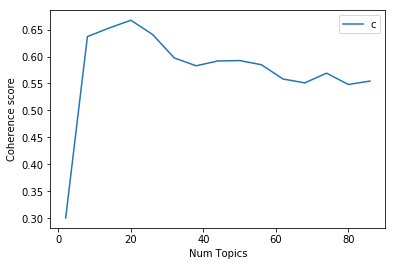

In [120]:
# Show graph
limit=92; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values1)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [121]:
#Print the coherence scores
for m, cv in zip(x, coherence_values1):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))


Num Topics = 2  has Coherence Value of 0.301
Num Topics = 8  has Coherence Value of 0.637
Num Topics = 14  has Coherence Value of 0.6528
Num Topics = 20  has Coherence Value of 0.6672
Num Topics = 26  has Coherence Value of 0.6407
Num Topics = 32  has Coherence Value of 0.5972
Num Topics = 38  has Coherence Value of 0.5828
Num Topics = 44  has Coherence Value of 0.5918
Num Topics = 50  has Coherence Value of 0.5925
Num Topics = 56  has Coherence Value of 0.5848
Num Topics = 62  has Coherence Value of 0.5583
Num Topics = 68  has Coherence Value of 0.5512
Num Topics = 74  has Coherence Value of 0.5692
Num Topics = 80  has Coherence Value of 0.5482
Num Topics = 86  has Coherence Value of 0.5545


### SELECT THE BEST MODEL (Here 50 topics, model number 8)

In [128]:
# Select the model and print the topics
optimal_model = model_list1[8]
model_topics = optimal_model.show_topics(num_topics=50,formatted=False)
#pprint(optimal_model.print_topics(num_words=10))
model_topics

[(0,
  [('device', 0.111392826),
   ('module', 0.056896556),
   ('storage', 0.05211343),
   ('memory', 0.03624442),
   ('electronic', 0.030187482),
   ('interface', 0.027645582),
   ('key', 0.025160875),
   ('data', 0.020348258),
   ('processor', 0.018442355),
   ('component', 0.018390572)]),
 (1,
  [('base', 0.091773026),
   ('support', 0.08967455),
   ('plate', 0.069618374),
   ('head', 0.019450504),
   ('cutting', 0.0193511),
   ('roller', 0.01919767),
   ('surface', 0.017995015),
   ('seat', 0.017345535),
   ('supporting', 0.016192272),
   ('mold', 0.015698364)]),
 (2,
  [('element', 0.12744153),
   ('member', 0.06837317),
   ('device', 0.03754227),
   ('position', 0.03267273),
   ('contact', 0.028965764),
   ('housing', 0.02250551),
   ('connector', 0.022372028),
   ('connection', 0.018309811),
   ('coupling', 0.016715424),
   ('cable', 0.014945321)]),
 (3,
  [('delivery', 0.093073435),
   ('drug', 0.055971235),
   ('cartridge', 0.041313678),
   ('dose', 0.040302157),
   ('device'

### Finding the dominant topic of our Optmial model (number 8) in each sentences

In [136]:
def format_topics_sentences1(ldamodel=lda, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords1 = format_topics_sentences1(ldamodel=optimal_model, corpus=corpus, texts=data)

# Format
df_dominant_topic1 = df_topic_sents_keywords1.reset_index()
df_dominant_topic1.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic1.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,25.0,0.2336,"sample, target, detection, detecting, presence...",The present invention relates to a device for ...
1,1,12.0,0.8932,"product, step, food, beverage, production, pre...",Provided at low cost are: an instant processed...
2,2,7.0,0.3290,"composition, acid, weight, comprising, polymer...",The disclosure features a human milk cream com...
3,3,41.0,0.3437,"protein, antibody, acid, comprising, peptide, ...",The present invention pertains to a muscle syn...
4,4,27.0,0.2338,"video, function, embodiment, technique, used, ...",An aerosol delivery device is provided that in...
5,5,46.0,0.3603,"unit, display, device, vehicle, window, batter...",A non-combustion-type flavor inhaler charging ...
6,6,21.0,0.3030,"part, carrier, holding, pin, insertion, fixing...",A method for producing an inside holding membe...
7,7,23.0,0.2766,"surface, outer, inner, side, wall, edge, membe...",A flavor inhaler having: a flavor source that ...
8,8,23.0,0.3669,"surface, outer, inner, side, wall, edge, membe...",A flavor inhaler has: a cylindrical holding me...
9,9,6.0,0.4822,"air, flow, liquid, water, discharge, device, n...",This flavor inhaler is provided with a housing...


In [137]:
final2 = pd.concat([df, df_dominant_topic1],axis=1)
final2.drop('Document_No', axis=1, inplace=True)
final2.drop('Text', axis=1, inplace=True)

In [140]:
for i in range(10,20):
    print("Abstract :", final2.iloc[i,22])
    print("\n")
    print("Title of the invention", final2.iloc[i,13])
    print("\n")
    print("Dominant topic number :" ,final2.iloc[i,24])
    print("\n")
    print("Topic Percentage Distribution :", final2.iloc[i,25])
    print("\n")
    print("Topic Keywords :", final2.iloc[i,26])
    print("_"*100)

Abstract : The present invention relates to a pump having a cosmetic ejecting pump formed therein and provided with a grip/lid and, more particularly, to a pump having a cosmetic ejecting pump formed therein and provided with a grip/lid, wherein the pump is attached to a supporting plate, and an ejecting pump for ejecting a cosmetic is formed inside the pump, so that when the pump is tapped against the skin to apply a cosmetic, the ejecting pump is actuated by the tapping motion and the cosmetic inside the pump container is ejected to the pump through an ejecting plate and can be directly applied to the skin. In addition, when the cosmetic inside the pump container is ejected through the ejecting plate, the cosmetic that is ejected from the ejecting pump can be evenly ejected because the ejecting holes at the center of the ejecting plate are formed to be smaller and the remaining ejecting holes are formed to become gradually larger away from the center.


Title of the invention PUMP HA

In [142]:
final2.head()

,Patent Type,51,11,11A,13,25,21,22,86,86A,87,30,62,54,73N,73C,71N,71C,72,74N,74C,wo_numbers1,abstract,tokenized,Dominant_Topic,Topic_Perc_Contrib,Keywords
0,Type1,A01N,1245584,EP3232777 A,A,En,18104999.3,18.04.2018,18.12.2015 PCT/EP2015/080688,PCT/EP2015/080688,23.06.2016 WO2016/097390,19.12.2014 EP 14382548,NaN,PRESERVATION AND TRANSPORT OF AN EX VIVO BIOLO...,NaN,NaN,Institut d'Investigacions Biomèdiques August P...,BARCELONA SPAIN,"PERALTA, Carmen",China Patent Agent (H.K.) Ltd.,Wanchai HONG KONG,WO2016097390,The present invention relates to a device for ...,"[device, transport, preservation, ex, vivo, bi...",25.0,0.2336,"sample, target, detection, detecting, presence..."
1,Type1,A23B2018,1245585,CN107404887 A,A,Ja,18105388.9,25.04.2018,18.03.2016 PCT/JP2016/058840,PCT/JP2016/058840,06.10.2016 WO2016/158527,30.03.2015 JP 2015-070361,NaN,INSTANT PROCESSED MEAT PRODUCT AND METHOD FOR ...,NaN,NaN,"SANYO FOODS CO., LTD.",TOKYO JAPAN,"NAGAYAMA, YOSHIAKI ONOZAWA, TORU",CLT Patent & Trademark (H.K.) Ltd.,Wanchai HONG KONG,WO2016158527,Provided at low cost are: an instant processed...,"[low, cost, instant, meat, product, extremely,...",12.0,0.8932,"product, step, food, beverage, production, pre..."
2,Type1,A23C,1245586,EP3240429 A,A,En,18105103.3,19.04.2018,30.12.2015 PCT/US2015/068050,PCT/US2015/068050,07.07.2016 WO2016/109659,"30.12.2014 US 62/098,151",NaN,METHODS OF PREVENTING AND TREATING BRONCHOPULM...,NaN,NaN,"PROLACTA BIOSCIENCE, INC.",CA UNITED STATESUNITED STATE...,Martin LEE Scott ELSTER Joseph...,SANYOU INTERNATIONAL INTELLECTUAL PROPERTY AGE...,WANCHAI HONG KONG,WO2016109659,The disclosure features a human milk cream com...,"[disclosure, feature, human, milk, cream, comp...",7.0,0.3290,"composition, acid, weight, comprising, polymer..."
3,Type1,A23LA61KA61P,1245588*,CN107427058 A,A,Ja,18104907.4,16.04.2018,29.01.2016 PCT/JP2016/052638,PCT/JP2016/052638,04.08.2016 WO2016/121923,29.01.2015 JP 2015-016093,NaN,MUSCLE SYNTHESIS PROMOTER,NaN,NaN,"MEIJI CO., LTD.",TOKYO JAPAN,NAKAYAMA Kyosuke KANDA Atsushi ...,Zhongzi IP,Wanchai Hong Kong,WO2016121923,The present invention pertains to a muscle syn...,"[pertains, muscle, synthesis, promoter, exhibi...",41.0,0.3437,"protein, antibody, acid, comprising, peptide, ..."
4,Type1,A24F,1245591,EP3229623 A,A,En,18104839.7,13.04.2018,04.12.2015 PCT/US2015/063929,PCT/US2015/063929,16.06.2016 WO2016/094225,"09.12.2014 US 14/565,137",NaN,GESTURE RECOGNITION USER INTERFACE FOR AN AERO...,NaN,NaN,"RAI Strategic Holdings, Inc.",WinstonSalem NC UNITED STATE...,"HENRY, Raymond C Jr LAMB, Wilson Chris...",CHLOE LEE & CO,Wanchai HONG KONG,WO2016094225,An aerosol delivery device is provided that in...,"[aerosol, delivery, device, housing, motion, s...",27.0,0.2338,"video, function, embodiment, technique, used, ..."


### SAVE OUR NEW FINAL DATAFRAME (each patent receive a dominant topic that characterize it)

In [143]:
final2.to_csv('dataframe_with_labels_50topics.csv')

### Topic Visualization from our best model

In [144]:
data1 = gensimvis.prepare(optimal_model, corpus, dictionary)
pyLDAvis.display(data1)

C:\Users\Cohort 2 DSFTML\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  return pd.concat([default_term_info] + list(topic_dfs))


### Saving Best Trained Model, Dictionary and Corpus

In [145]:
from gensim.test.utils import datapath

# Save model to disk.
temp_file = datapath("C:\\Users\\Cohort 2 DSFTML\\Desktop\\Capstone Benjamin\\New_lda_model\\modelfinal50topics")
optimal_model.save(temp_file)

# # Load a potentially pretrained model from disk.
lda = LdaModel.load(temp_file)

In [147]:
from gensim.corpora import Dictionary, MmCorpus

In [148]:
MmCorpus.serialize('abstract_final_50.mm', corpus)
dictionary.save('abstract_final_50.dict')

In [ ]:
#corpus = MmCorpus('abstract.mm')
#corpus[0]

In [ ]:
#dictionary = Dictionary.load('abstract.dict')
#dictionary[0]